In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
from datetime import datetime

In [4]:
avisos = pd.read_csv('/home/luupesado/Documentos/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

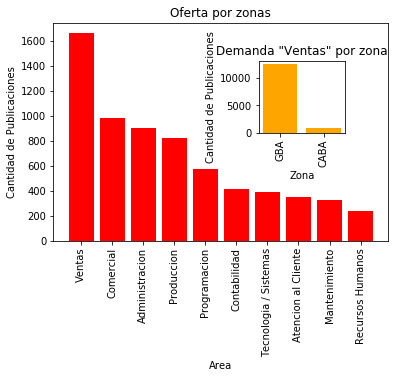

In [125]:
areas = avisos['nombre_area'].value_counts().head(10)#.plot(kind='bar', color = 'orange'))
fig, ax = plt.subplots()

#plt.axes(figsize=(20,10))

ax.bar(np.arange(10), areas, color = 'red')
ax.set_xticks(np.arange(10))#, ('a','b','c','d','e','f','g','h','i','j'))#ax.set_x
ax.set_xticklabels(klist,rotation='vertical')
ax.set_title('Oferta por zonas')
ax.set_xlabel('Area')
ax.set_ylabel('Cantidad de Publicaciones')

klist2 = ['GBA', 'CABA'] 
zonas = avisos['nombre_zona'].value_counts().head(2)
sub_axes = plt.axes([.6, .5, .20, .25])
sub_axes.bar(np.arange(len(zonas)), zonas, color = 'orange')
sub_axes.set_xticks(np.arange(2))#, ('a','b','c','d','e','f','g','h','i','j'))#ax.set_x
sub_axes.set_xticklabels(klist2,rotation='vertical')
sub_axes.set_title('Demanda "Ventas" por zona')
sub_axes.set_xlabel('Zona')
sub_axes.set_ylabel('Cantidad de Publicaciones')


In [81]:
import unicodedata
def elimina_tildes(s):
   return ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))
 
# que se puede usar asi:


In [88]:
keys = areas.keys()
klist = []
for k in keys:
    klist.append(elimina_tildes(k.decode('utf-8')))
    
klist    

[u'Ventas',
 u'Comercial',
 u'Administracion',
 u'Produccion',
 u'Programacion',
 u'Contabilidad',
 u'Tecnologia / Sistemas',
 u'Atencion al Cliente',
 u'Mantenimiento',
 u'Recursos Humanos']

In [41]:
np.arange(5)

array([0, 1, 2, 3, 4])

<Container object of 5 artists>

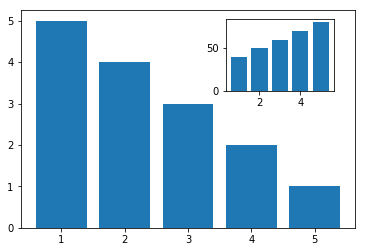

In [32]:
x =(1,2,3,4,5)
y = (5,4,3,2,1)
y2 = (40,50,60,70,80)

plt.bar(x,y)

sub_axes = plt.axes([.6, .6, .25, .25])
sub_axes.bar(x, y2)#, kind= 'bar')

In [103]:
zonas

Gran Buenos Aires              12654
Capital Federal                  876
GBA Oeste                          2
Buenos Aires (fuera de GBA)        2
Name: nombre_zona, dtype: int64

In [7]:
postulaciones = pd.read_csv('/home/luupesado/Documentos/datos_navent_fiuba/fiuba_4_postulaciones.csv')
postulaciones['fechapostulacion'] = pd.to_datetime(postulaciones['fechapostulacion'])
postulaciones['dia'] = postulaciones['fechapostulacion'].dt.weekday_name

In [9]:
postulacionesdia = postulaciones.groupby('dia')['idaviso'].count()

In [ ]:
fig, ax = plt.subplots()
x = ()
postulacionesdia.plot(kind='bar',figsize=(16,8),rot=85,title='Postulaciones por dia');
ax.set_ylabel('Cantidad de postulaciones')
ax.set_xlabel('Dia')

In [10]:
postulacionesdia

dia
Friday       446698
Monday       668310
Saturday     217331
Sunday       226857
Thursday     506163
Tuesday      658428
Wednesday    677836
Name: idaviso, dtype: int64

In [72]:
y = [postulacionesdia.Monday, postulacionesdia.Tuesday, postulacionesdia.Wednesday, postulacionesdia.Thursday, postulacionesdia.Friday,postulacionesdia.Saturday,postulacionesdia.Sunday]
x = ['Monday', 'Tuesday','Wednesday', 'Thursday',  'Friday', 'Saturday', 'Sunday']

In [37]:
postulaciones['mes'] = postulaciones['fechapostulacion'].dt.month

In [39]:
postulacionesmes = postulaciones.groupby(['mes','dia'])['idaviso'].count()

In [51]:
postulacionesmes

mes  dia      
1    Friday       141935
     Monday       283169
     Saturday      68344
     Sunday        70437
     Thursday     161108
     Tuesday      275708
     Wednesday    275497
2    Friday       304763
     Monday       385141
     Saturday     148987
     Sunday       156420
     Thursday     345055
     Tuesday      382720
     Wednesday    402339
Name: idaviso, dtype: int64

In [67]:
jan_y = [postulacionesmes[1].Monday, postulacionesmes[1].Tuesday, postulacionesmes[1].Wednesday, postulacionesmes[1].Thursday, postulacionesmes[1].Friday,postulacionesmes[1].Saturday,postulacionesmes[1].Sunday]
feb_y = [postulacionesmes[2].Monday, postulacionesmes[2].Tuesday, postulacionesmes[2].Wednesday, postulacionesmes[2].Thursday, postulacionesmes[2].Friday,postulacionesmes[2].Saturday,postulacionesmes[2].Sunday]

In [68]:
jan_y, feb_y

([283169, 275708, 275497, 161108, 141935, 68344, 70437],
 [385141, 382720, 402339, 345055, 304763, 148987, 156420])

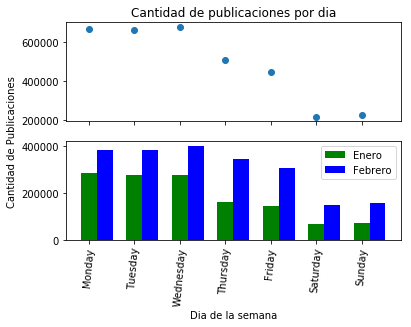

In [102]:
fig, (ax1, ax2)=plt.subplots(2,1,sharex = True)
ax1.scatter(np.arange(7), y)
ax1.set_xticks(np.arange(7))
ax1.set_xticklabels(x,rotation='horizontal')
ax2.set_xlabel('Dia de la semana')
ax2.set_ylabel('Cantidad de Publicaciones', x=1,y=1)

width = 0.35
jan = ax2.bar(np.arange(len(jan_y)), jan_y, width, color = 'Green')
feb = ax2.bar(np.arange(len(feb_y))+width, feb_y, width, color = 'Blue')
ax2.set_xticks(np.arange(7))
ax2.set_xticklabels(x,rotation=85)

ax2.legend((jan[0], feb[0]), ('Enero', 'Febrero'))

ax1.set_title('Cantidad de publicaciones por dia')
#ax2.set_title('Cantidad de publicaciones por dia')
